

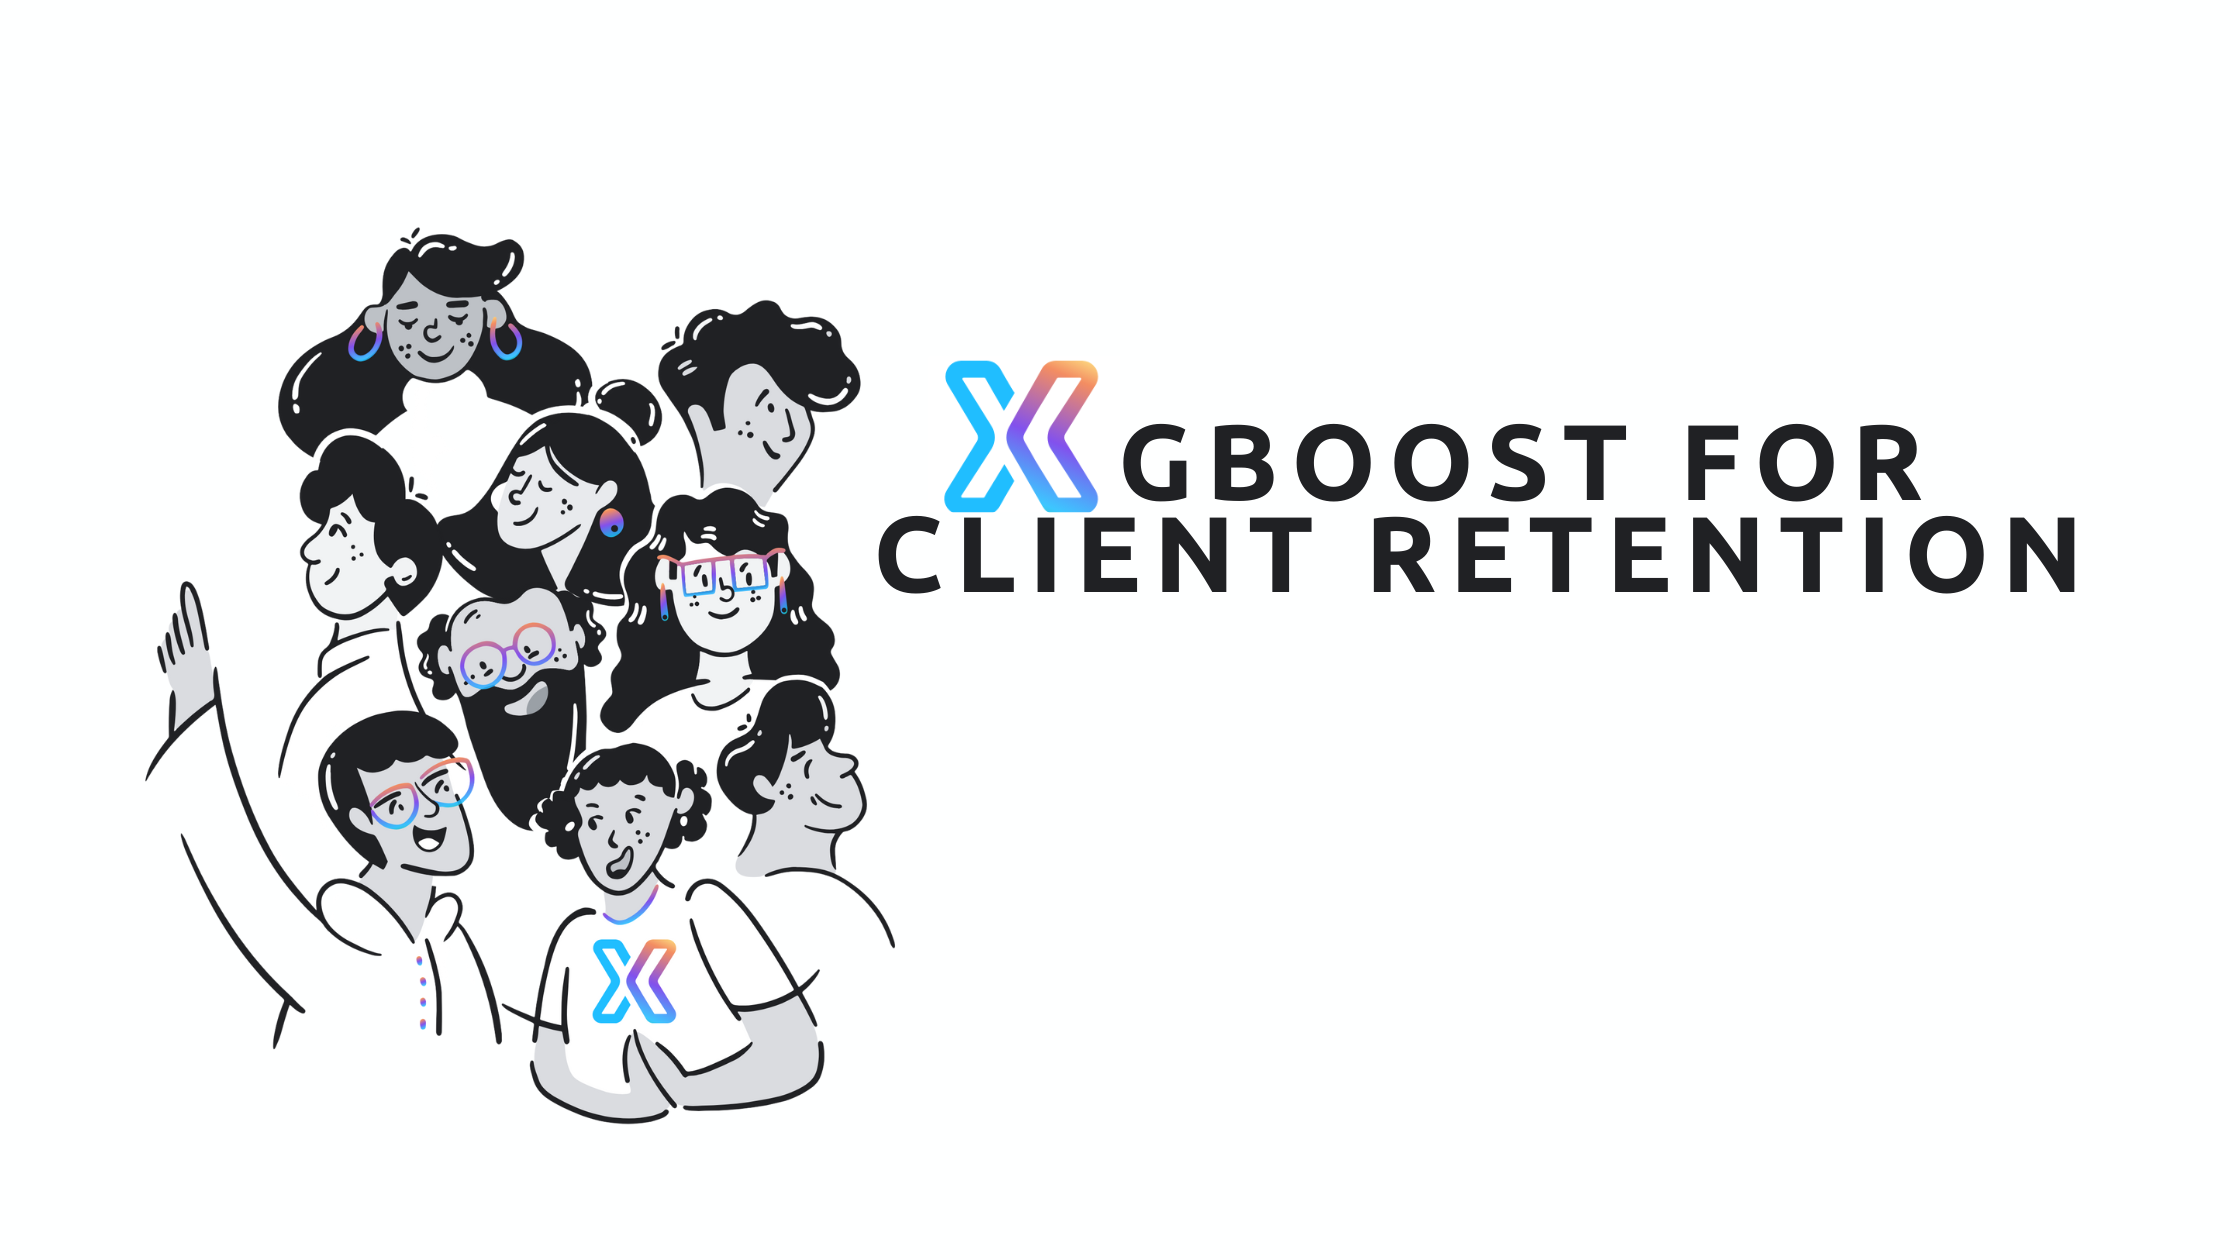


# **Project Process**
**1. Data Acquisition:** Gathering and preparing the necessary data for the model. This may include data collection, cleaning, transformation, and processing.

**2. Data Preprocessing:** Getting the data ready for use in the model, involving tasks such as normalization, encoding categorical variables, handling missing values, and other cleaning and transformation processes.

**3. Model Training:** Developing the machine learning model using the training data. This may involve selecting appropriate algorithms, defining hyperparameters, and tuning the model.

**4. Model Evaluation:** Measuring the model's performance using test or validation data. This includes assessing relevant metrics such as accuracy, recall, F1-score, or any metric crucial to the task.


Libraries/ Librerias

In [ ]:
!jupyter nbconvert --to html /content/FinalXGBOOST19.ipynb


[NbConvertApp] Converting notebook /content/FinalXGBOOST19.ipynb to html
[NbConvertApp] Writing 5535095 bytes to /content/FinalXGBOOST19.html


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Loading Churn Modelling Data into a Pandas DataFrame/ Cargando datos de modelado de rotación en un marco de datos de Pandas


In [ ]:
data = pd.read_csv("sample_data/Churn_Modelling.csv")


# **Data Attributes:**

**Customer ID:** A unique identifier for each customer

**Surname:** The customer's surname or last name

**Credit Score:** A numerical value representing the customer's credit score

**Geography:** The country where the customer resides (France, Spain or Germany)

**Gender:** The customer's gender (Male or Female)

**Age:** The customer's age.

**Tenure:** The number of years the customer has been with the bank

**Balance:** The customer's account balance

**NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)

**HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)

**IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)

**EstimatedSalary:** The estimated salary of the customer

**Exited:** Whether the customer has churned (1 = yes, 0 = no)

# **Data Overview and Preprocessing/Analisis de datos y preprocesamiento**

XGBoost can work well on datasets with more than 1000 values, but it effectiveness depends on various factors.

In [ ]:
# shape
print(data.shape)

(10000, 14)


In [ ]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [ ]:
# Count the non-null values in each row and create a new column 'NonNullCount'
datea = data.count(axis=0)
print(datea)


RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64


In [ ]:
data.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
# Drop specific columns from the dataframe
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(columns_to_drop, axis=1)


In [ ]:
data.head(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
data.cov()

<ipython-input-46-72e63cb34c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


CreditScore           Age       Tenure       Balance  \
CreditScore       9341.860157     -4.019150     0.235355  3.780408e+04   
Age                 -4.019150    109.994084    -0.303229  1.852533e+04   
Tenure               0.235355     -0.303229     8.364673 -2.211395e+03   
Balance          37804.076998  18525.333354 -2211.394696  3.893436e+09   
NumOfProducts        0.687999     -0.187157     0.022616 -1.103982e+04   
HasCrCard           -0.240492     -0.056036     0.029773 -4.226198e+02   
IsActiveMember       1.239139      0.448026    -0.040997 -3.144831e+02   
EstimatedSalary  -7694.701048  -4343.372926  1294.686597  4.592389e+07   
Exited              -1.054722      1.205250    -0.016309  2.978932e+03   

                 NumOfProducts   HasCrCard  IsActiveMember  EstimatedSalary  \
CreditScore           0.687999   -0.240492        1.239139    -7.694701e+03   
Age                  -0.187157   -0.056036        0.448026    -4.343373e+03   
Tenure                0.022616    0.029773       -0.040997     1.294687e+03   
Balance          -11039.815064 -422.619801     -314.483074     4.592389e+07   
NumOfProducts         0.338322    0.000844        0.002794     4.751478e+02   
HasCrCard             0.000844    0.207791       -0.002703    -2.604105e+02   
IsActiveMember        0.002794   -0.002703        0.249797    -3.282927e+02   
EstimatedSalary     475.147781 -260.410522     -328.292660     3.307457e+09   
Exited               -0.011203   -0.001310       -0.031429     2.802047e+02   

                      Exited  
CreditScore        -1.054722  
Age                 1.205250  
Tenure             -0.016309  
Balance          2978.931708  
NumOfProducts      -0.011203  
HasCrCard          -0.001310  
IsActiveMember     -0.031429  
EstimatedSalary   280.204670  
Exited              0.162223

In [ ]:
Not_Exited=data[data.Exited==0]
Exited=data[data.Exited==1]
Not_Exited.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  7963.000000  7963.000000  7963.000000    7963.000000    7963.000000   
mean    651.853196    37.408389     5.033279   72745.296779       1.544267   
std      95.653837    10.125363     2.880658   62848.040701       0.509536   
min     405.000000    18.000000     0.000000       0.000000       1.000000   
25%     585.000000    31.000000     3.000000       0.000000       1.000000   
50%     653.000000    36.000000     5.000000   92072.680000       2.000000   
75%     718.000000    41.000000     7.000000  126410.280000       2.000000   
max     850.000000    92.000000    10.000000  221532.800000       3.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count  7963.000000     7963.000000      7963.000000  7963.0  
mean      0.707146        0.554565     99738.391772     0.0  
std       0.455101        0.497045     57405.586966     0.0  
min       0.000000        0.000000        90.070000     0.0  
25%       0.000000        0.000000     50783.490000     0.0  
50%       1.000000        1.000000     99645.040000     0.0  
75%       1.000000        1.000000    148609.955000     0.0  
max       1.000000        1.000000    199992.480000     0.0

In [ ]:
Exited.describe()

CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2037.000000  2037.000000  2037.000000    2037.000000    2037.000000   
mean    645.351497    44.837997     4.932744   91108.539337       1.475209   
std     100.321503     9.761562     2.936106   58360.794816       0.801521   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     578.000000    38.000000     2.000000   38340.020000       1.000000   
50%     646.000000    45.000000     5.000000  109349.290000       1.000000   
75%     716.000000    51.000000     8.000000  131433.330000       2.000000   
max     850.000000    84.000000    10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count  2037.000000     2037.000000      2037.000000  2037.0  
mean      0.699067        0.360825    101465.677531     1.0  
std       0.458776        0.480358     57912.418071     0.0  
min       0.000000        0.000000        11.580000     1.0  
25%       0.000000        0.000000     51907.720000     1.0  
50%       1.000000        0.000000    102460.840000     1.0  
75%       1.000000        1.000000    152422.910000     1.0  
max       1.000000        1.000000    199808.100000     1.0

# **Histograms of Selected Features/Histogramas de características seleccionadas**

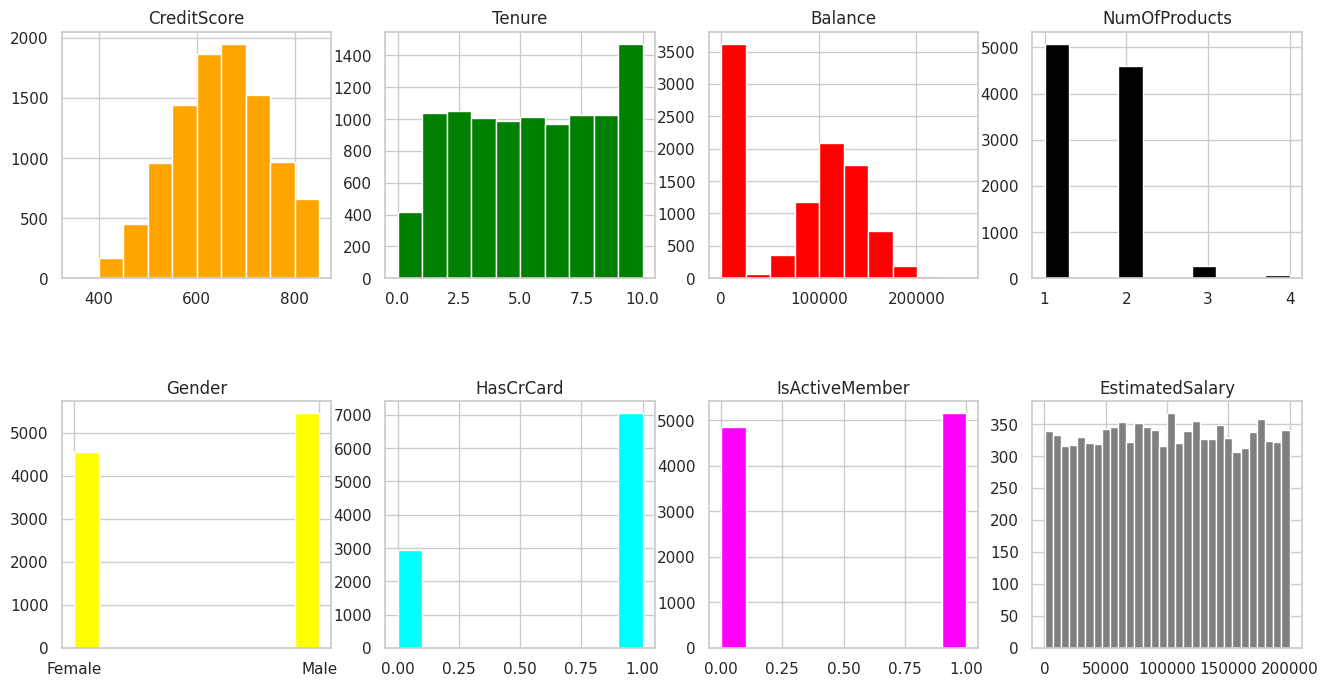

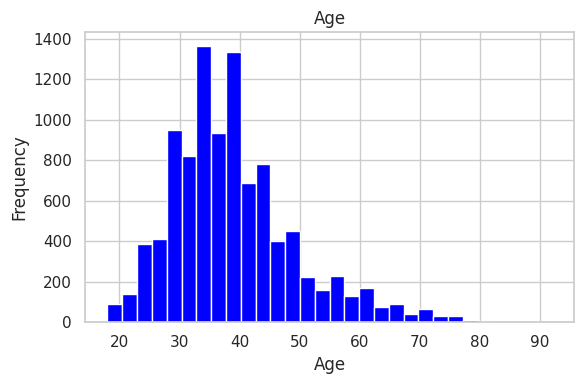

In [ ]:
import matplotlib.pyplot as plt

# Select the columns for which you want to plot histograms
columns_to_plot = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'Gender','HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Define a list of colors for each column
colors = ['orange', 'green', 'red', 'black', 'yellow', 'cyan', 'magenta', 'gray']

# Create subplots for each column except Age
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    ax = axes[i // 4, i % 4]
    if col == 'EstimatedSalary':
        data[col].hist(bins=30, color=color, ax=ax)
    else:
        data[col].hist(color=color, ax=ax)
    ax.set_title(col)

# Plot Age separately with actual values
fig, ax = plt.subplots(figsize=(6, 4))
data['Age'].hist(color='blue', ax=ax, bins=30)
ax.set_title('Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age')

plt.tight_layout()
plt.show()


# **Feature Preprocessing with Standardization and One-Hot Encoding/Preprocesamiento de características con estandarización y codificación one-hot**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Extract the numerical features for scaling
numerical_features = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts']
categorical_features = ['Geography', 'Gender']

# Apply standardization to the numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check if the categorical columns are present in the DataFrame
if all(col in data.columns for col in categorical_features):
    # Apply one-hot encoding to categorical features
    data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
else:
    print("One or more categorical columns are missing in the DataFrame.")



**Covariance between columns:** Each cell in the table displays the covariance between two columns. For example, the covariance between "Age" and "Balance" is 18525.33, suggesting that as age increases, balance also tends to increase. On the other hand, the covariance between "Age" and "Tenure" is -0.303, indicating an inverse relationship: as age increases, tenure tends to decrease.

**Variance of the diagonal columns:** The main diagonal of the matrix shows the variance of each individual column. For instance, the variance of "Age" is 109.99, indicating how much age varies on its own.

**Negative values: **When you see negative values in covariance, it indicates an inverse or negative relationship between the two variables. For example, the negative covariance between "Age" and "Tenure" suggests that as one variable increases, the other tends to decrease.

**Positive values:** Positive covariance values indicate a positive relationship between the two variables. For instance, a positive covariance between "Age" and "Balance" suggests that as one variable increases, the other also tends to increase.

**Main diagonal:** The values on the main diagonal are the individual variances of each column. These variances indicate how much each variable varies on its own.

**Covarianza entre columnas**: Cada celda en la tabla muestra la covarianza entre dos columnas. Por ejemplo, la covarianza entre "Age" y "Balance" es 18525.33, lo que sugiere que a medida que la edad aumenta, el saldo también tiende a aumentar. Por otro lado, la covarianza entre "Age" y "Tenure" es -0.303, lo que indica una relación inversa: a medida que la edad aumenta, la tenencia tiende a disminuir.

**Varianza de las columnas diagonales:** La diagonal principal de la matriz muestra la varianza de cada columna individual. Por ejemplo, la varianza de "Age" es 109.99, lo que indica cuánto varía la edad por sí sola.


**Valores negativos:** Cuando ves valores negativos en la covarianza, indica una relación inversa o negativa entre las dos variables. Por ejemplo, la covarianza negativa entre "Age" y "Tenure" sugiere que a medida que una variable aumenta, la otra tiende a disminuir.

**Valores positivos:** Los valores de covarianza positivos indican una relación positiva entre las dos variables. Por ejemplo, una covarianza positiva entre "Age" y "Balance" sugiere que a medida que una variable aumenta, la otra también tiende a aumentar.

**Diagonal principal:** Los valores en la diagonal principal son las varianzas individuales de cada columna. Estas varianzas indican cuánto varía cada variable por sí sola.

# Correlation Matrix and Relevant Variables/
# Matriz de Correlación y Variables Relevantes

In [ ]:
columns_of_interest = [
    'CreditScore', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'
]

# CORRELATION MATRIX= NORMALIZED COVARIANCE
correlation_matrix = data[columns_of_interest].corr()


print(correlation_matrix)

                 CreditScore    Tenure   Balance  NumOfProducts  HasCrCard  \
CreditScore         1.000000  0.000842  0.006268       0.012238  -0.005458   
Tenure              0.000842  1.000000 -0.012254       0.013444   0.022583   
Balance             0.006268 -0.012254  1.000000      -0.304180  -0.014858   
NumOfProducts       0.012238  0.013444 -0.304180       1.000000   0.003183   
HasCrCard          -0.005458  0.022583 -0.014858       0.003183   1.000000   
IsActiveMember      0.025651 -0.028362 -0.010084       0.009612  -0.011866   
EstimatedSalary    -0.001384  0.007784  0.012797       0.014204  -0.009933   
Exited             -0.027094 -0.014001  0.118533      -0.047820  -0.007138   

                 IsActiveMember  EstimatedSalary    Exited  
CreditScore            0.025651        -0.001384 -0.027094  
Tenure                -0.028362         0.007784 -0.014001  
Balance               -0.010084         0.012797  0.118533  
NumOfProducts          0.009612         0.014204 -0.0

In [ ]:
nulos_por_columna = data.isnull().sum()

# prints the amount of null values
print(nulos_por_columna)

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


Uncorrelated Variables: Variables such as "Tenure," "HasCrCard," and "EstimatedSalary" have correlations very close to zero with "Exited," suggesting that they are not strongly related to a customer's decision to leave or stay.
Variables no correlacionadas: Variables como "Tenure", "HasCrCard" y "EstimatedSalary" tienen correlaciones muy cercanas a cero con "Exited", lo que sugiere que no están fuertemente relacionadas con la decisión de un cliente de abandonar o quedarse


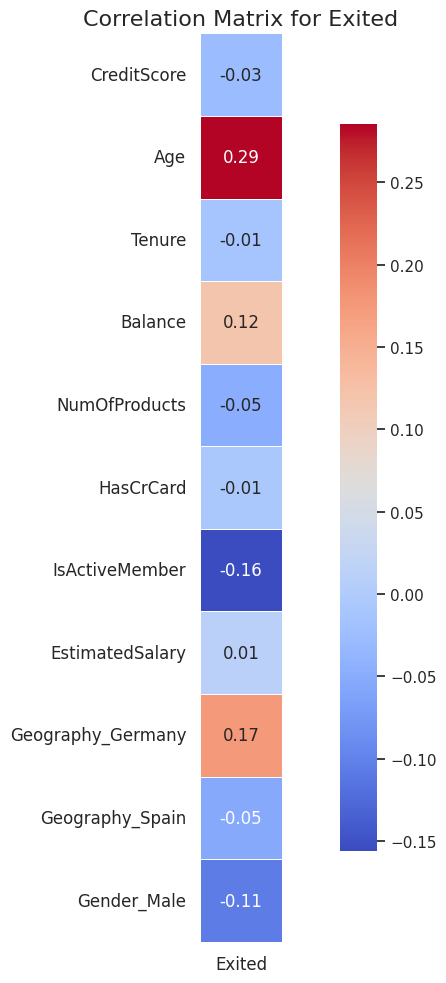

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your data
# You can create a correlation matrix specifically for 'Exited' column
correlation_exit = data.corr()['Exited'].drop('Exited')

# Set up the figure and axis
plt.figure(figsize=(12, 10))

# Create a correlation plot with circles
sns.heatmap(correlation_exit.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})

# Customize the plot further
plt.title("Correlation Matrix for Exited", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


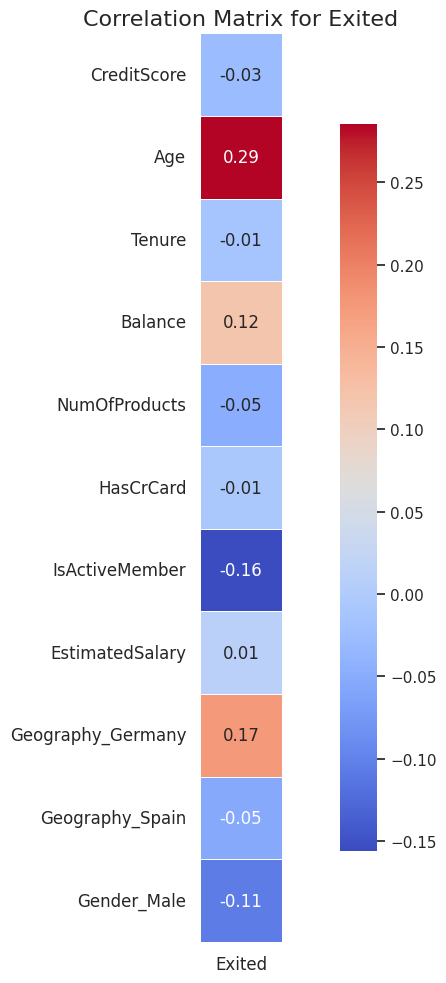

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your data
# You can create a correlation matrix specifically for the 'Exited' column
correlation_exit = data.corr()['Exited'].drop('Exited')

# Set up the figure and axis
plt.figure(figsize=(12, 10))

# Create a correlation plot with circles
sns.heatmap(correlation_exit.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})

# Customize the plot further
plt.title("Correlation Matrix for Exited", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Exited'].sort_values(ascending=False)

print(correlation_with_target)


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64


The variable "Age" has a significant positive correlation with "Exited," suggesting that as age increases, it's more likely for someone to stop being a customer. The variable "Balance" also has a positive correlation with "Exited," indicating that customers with higher balances are more likely to churn. "IsActiveMember" has a negative correlation with "Exited," suggesting that active members are less likely to churn. Other correlations are mostly low and close to zero.

Uncorrelated Variables: Variables such as "Tenure," "HasCrCard," and "EstimatedSalary" have correlations very close to zero with "Exited," suggesting they are not strongly related to a customer's decision to churn or stay.

Correlaciones significativas:

La variable "Age" tiene una correlación positiva significativa con "Exited", lo que sugiere que a medida que la edad aumenta, es más probable que alguien deje de ser cliente.
La variable "Balance" también tiene una correlación positiva con "Exited", lo que indica que los clientes con saldos más altos son más propensos a abandonar.
"IsActiveMember" tiene una correlación negativa con "Exited", lo que sugiere que los miembros activos son menos propensos a abandonar.
Otras correlaciones son en su mayoría bajas y cercanas a cero.

In [ ]:
# Display summary statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)


        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  10000.000000  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16     38.921800 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00     10.487806  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00     18.000000 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01     32.000000 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02     37.000000 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01     44.000000  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00     92.000000  1.724464e+00  2.795323e+00   4.246377e+00   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203700   
std        0.45584        0.499797     57510.492818      0.402769   
min

Insignificant variables are removed, which do not represent important data.

se eliminan las variables que no representan datos importantes.

**Count:** the number of non-missing values in each numerical column.
**Mean:** the average value of the data points in each numerical column.
**Standard deviation:** a measure of the amount of variation or dispersion of the data points around the mean.
**Minimum and maximum:** the smallest and largest values in each numerical column.
**Quartiles (25th, 50th, and 75th percentiles):** values that divide the data into quarters, providing insights into the data distribution.

In [ ]:
data.head(5)

CreditScore  Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221   42 -1.041760 -1.225848      -0.911583          1   
1    -0.440036   41 -1.387538  0.117350      -0.911583          0   
2    -1.536794   42  1.032908  1.333053       2.527057          1   
3     0.501521   39 -1.387538 -1.225848       0.807737          0   
4     2.063884   43 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0

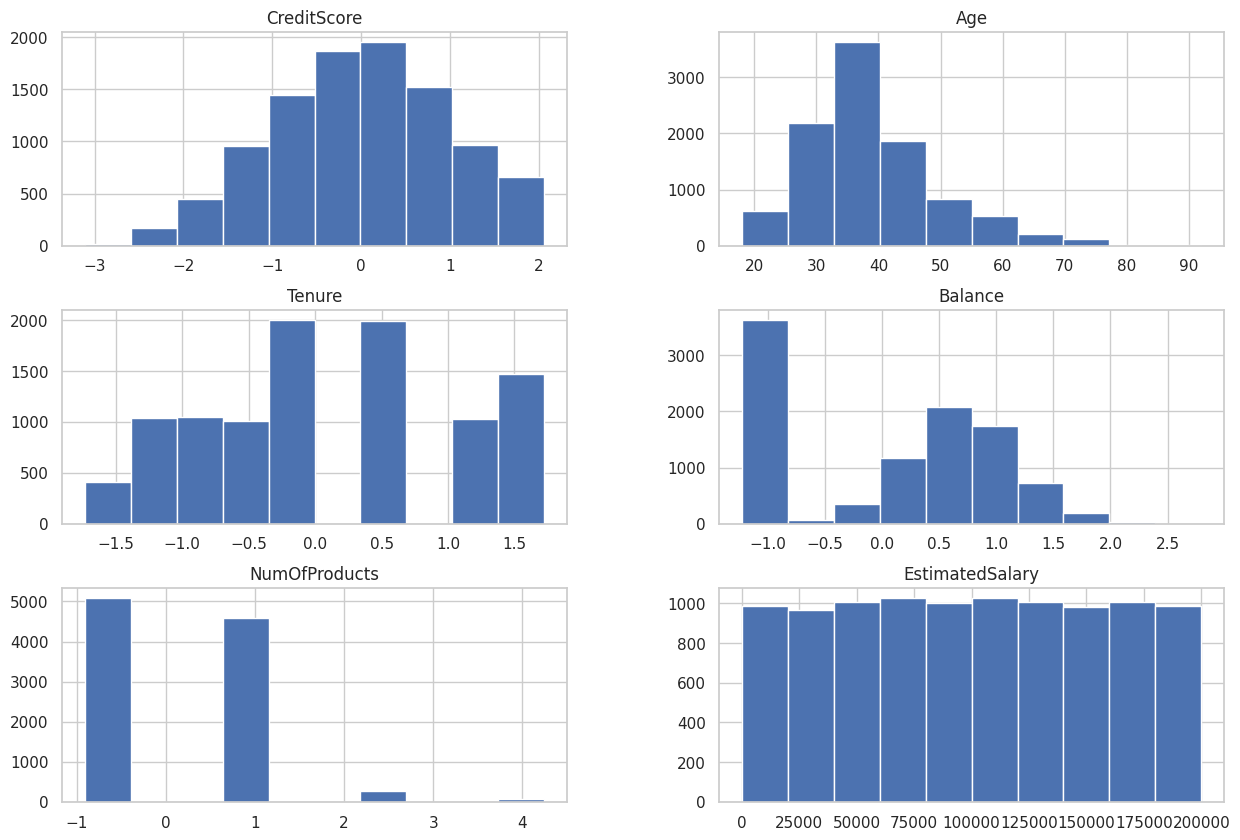

In [ ]:
import matplotlib.pyplot as plt

data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].hist(bins=10, figsize=(15, 10))
plt.show()


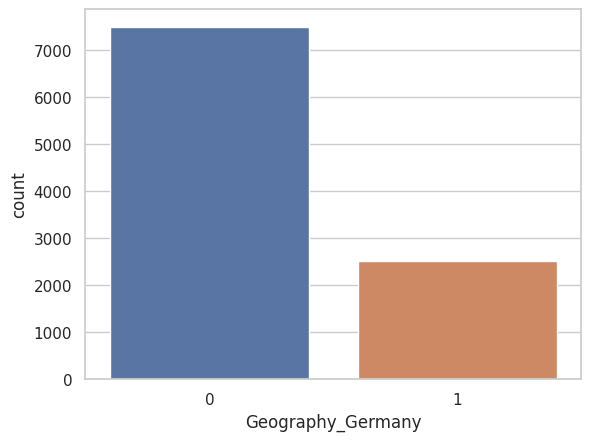

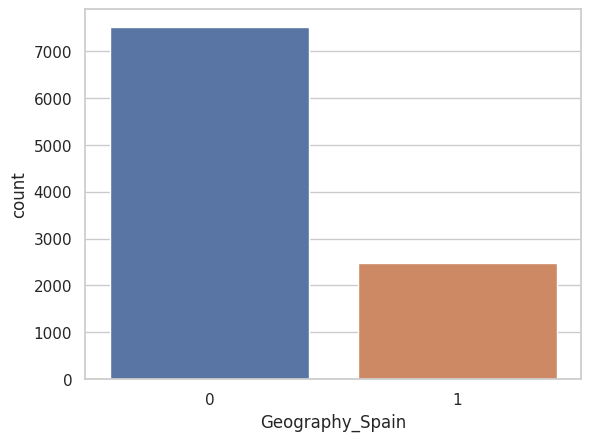

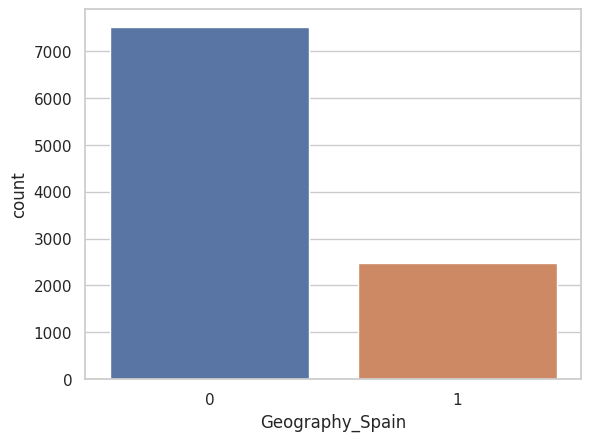

In [ ]:
import seaborn as sns

sns.countplot(x='Geography_Germany', data=data)
plt.show()

sns.countplot(x='Geography_Spain', data=data)
plt.show()
sns.countplot(x='Geography_Spain', data=data)
plt.show()




In [ ]:
data.dtypes

CreditScore          float64
Age                    int64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

In [ ]:
sorted_data = data.groupby('CreditScore').size().reset_index(name='Count')
sorted_data = sorted_data.sort_values(by='CreditScore', ascending=True)
print(sorted_data)


     CreditScore  Count
0      -3.109504      5
1      -3.099157      1
2      -3.026730      1
3      -3.016383      1
4      -2.974996      1
..           ...    ...
455     2.022497      5
456     2.032843      6
457     2.043190      5
458     2.053537      8
459     2.063884    233

[460 rows x 2 columns]


**Data visualization**




CreditScore  Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.326221   42 -1.041760 -1.225848      -0.911583          1   
1    -0.440036   41 -1.387538  0.117350      -0.911583          0   
2    -1.536794   42  1.032908  1.333053       2.527057          1   
3     0.501521   39 -1.387538 -1.225848       0.807737          0   
4     2.063884   43 -1.041760  0.785728      -0.911583          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1                2       1                  0   
1               1                2       0                  0   
2               0                2       1                  0   
3               0                1       0                  0   
4               1                1       0                  0   

   Geography_Spain  Gender_Male  CreditScore_Category  
0                0            0                     0  
1                1            0                     0  
2                0            0                     0  
3                0            0                     0  
4                1            0                     0

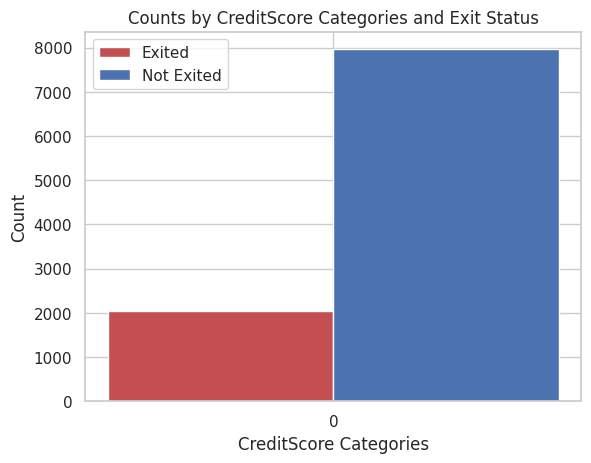

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the function credit_score_table
def credit_score_table(row):
    credit_score = row['CreditScore']
    if credit_score >= 300 and credit_score < 500:
        return 2
    elif credit_score >= 500 and credit_score < 601:
        return 3
    elif credit_score >= 601 and credit_score < 661:
        return 4
    elif credit_score >= 661 and credit_score < 781:
        return 5
    elif credit_score >= 851:
        return 7
    elif credit_score >= 781 and credit_score < 851:
        return 6
    elif credit_score < 300:
        return 0

# Example data modification for the 'data' DataFrame
data['CreditScore_Category'] = data.apply(credit_score_table, axis=1)

# Calculate the count of 'Exited' and 'Not Exited' for each 'CreditScore' category
exited_counts = data[data['Exited'] == 1]['CreditScore_Category'].value_counts().sort_index()
not_exited_counts = data[data['Exited'] == 0]['CreditScore_Category'].value_counts().sort_index()

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(exited_counts))

bar1 = ax.bar(index, exited_counts, bar_width, label='Exited', color='r')
bar2 = ax.bar(index + bar_width, not_exited_counts, bar_width, label='Not Exited', color='b')

ax.set_xlabel('CreditScore Categories')
ax.set_ylabel('Count')
ax.set_title('Counts by CreditScore Categories and Exit Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(exited_counts.index)
ax.legend()

# Additional segment you provided
data.loc[(data['EstimatedSalary'] > -188.401) & (data['EstimatedSalary'] <= 50006.805), 'EstimatedSalary'] = 0
data.loc[(data['EstimatedSalary'] > 50006.805) & (data['EstimatedSalary'] <= 100002.03), 'EstimatedSalary'] = 1
data.loc[(data['EstimatedSalary'] > 100002.03) & (data['EstimatedSalary'] <= 149997.255), 'EstimatedSalary'] = 2
data.loc[(data['EstimatedSalary'] > 149997.255) & (data['EstimatedSalary'] <= 199992.48), 'EstimatedSalary'] = 3
data['EstimatedSalary'] = data['EstimatedSalary'].astype(int)

data.head()


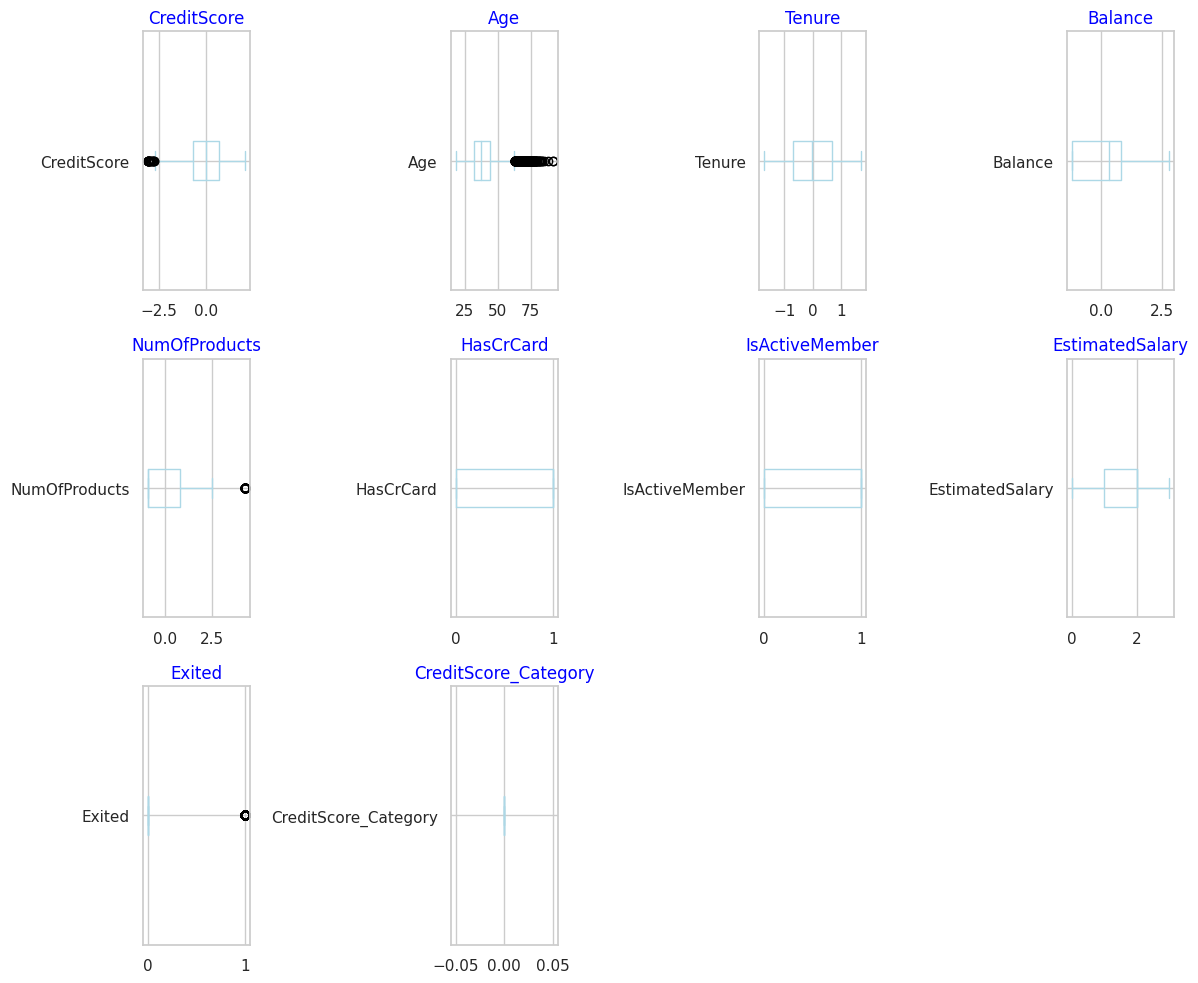

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
columnas_numericas = data.select_dtypes(include=['int64', 'float64'])

# Calcular el número de subtramas necesarias en función del número de columnas numéricas
num_cols = min(len(columnas_numericas.columns), 4)
num_rows = (len(columnas_numericas.columns) + num_cols - 1) // num_cols

# Crear subtramas en una disposición de cuadrícula num_rows x num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Recorrer las columnas numéricas y crear diagramas de caja y bigotes
for ax, columna in zip(axes.flat, columnas_numericas.columns):
    columnas_numericas[columna].plot(kind='box', ax=ax, color='lightblue', vert=False)
    ax.set_title(columna, color='blue')

# Eliminar cualquier subtrama no utilizada
for i in range(len(columnas_numericas.columns), num_rows * num_cols):
    fig.delaxes(axes.flat[i])

# Ajustar el espaciado entre las subtramas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


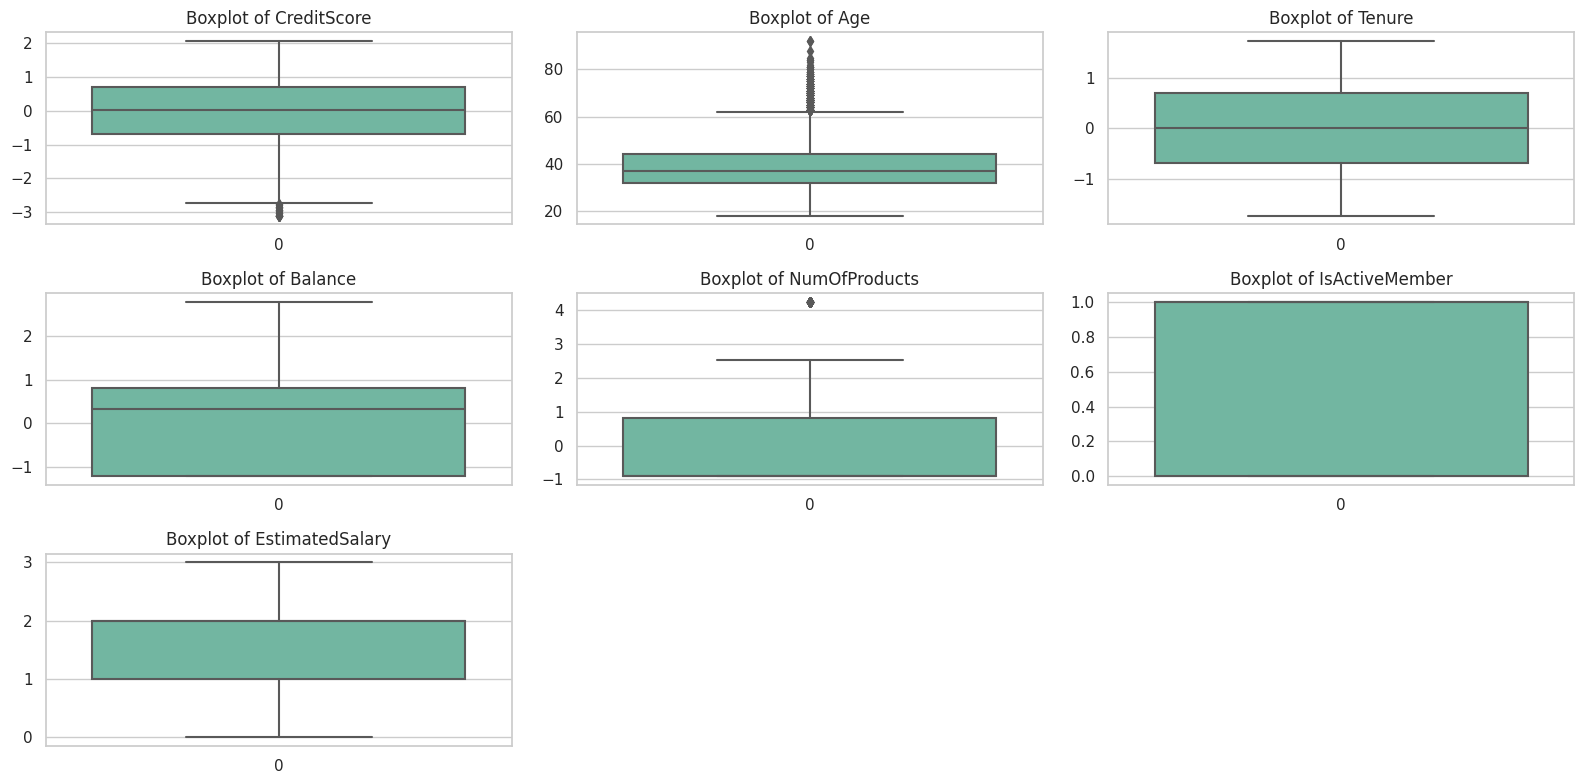

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest
columns_of_interest = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
]

# Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create a boxplot for each column of interest
plt.figure(figsize=(16, 8))  # Set the figure size

# Loop through each column and create a boxplot
for i, column in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    sns.boxplot(data=data[column], palette="Set2")
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()


In [ ]:
# Display summary statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)


        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  10000.000000  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16     38.921800 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00     10.487806  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00     18.000000 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01     32.000000 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02     37.000000 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01     44.000000  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00     92.000000  1.724464e+00  2.795323e+00   4.246377e+00   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000      10000.00000  10000.000000   
mean       0.70550        0.515100          1.50120      0.203700   
std        0.45584        0.499797          1.10983      0.402769   
min

In [ ]:
# Display summary statistics for numerical columns
numerical_summary = data.describe()
print(numerical_summary)


        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  10000.000000  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16     38.921800 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00     10.487806  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00     18.000000 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01     32.000000 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02     37.000000 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01     44.000000  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00     92.000000  1.724464e+00  2.795323e+00   4.246377e+00   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000      10000.00000  10000.000000   
mean       0.70550        0.515100          1.50120      0.203700   
std        0.45584        0.499797          1.10983      0.402769   
min

Histograma

Scatter plots:

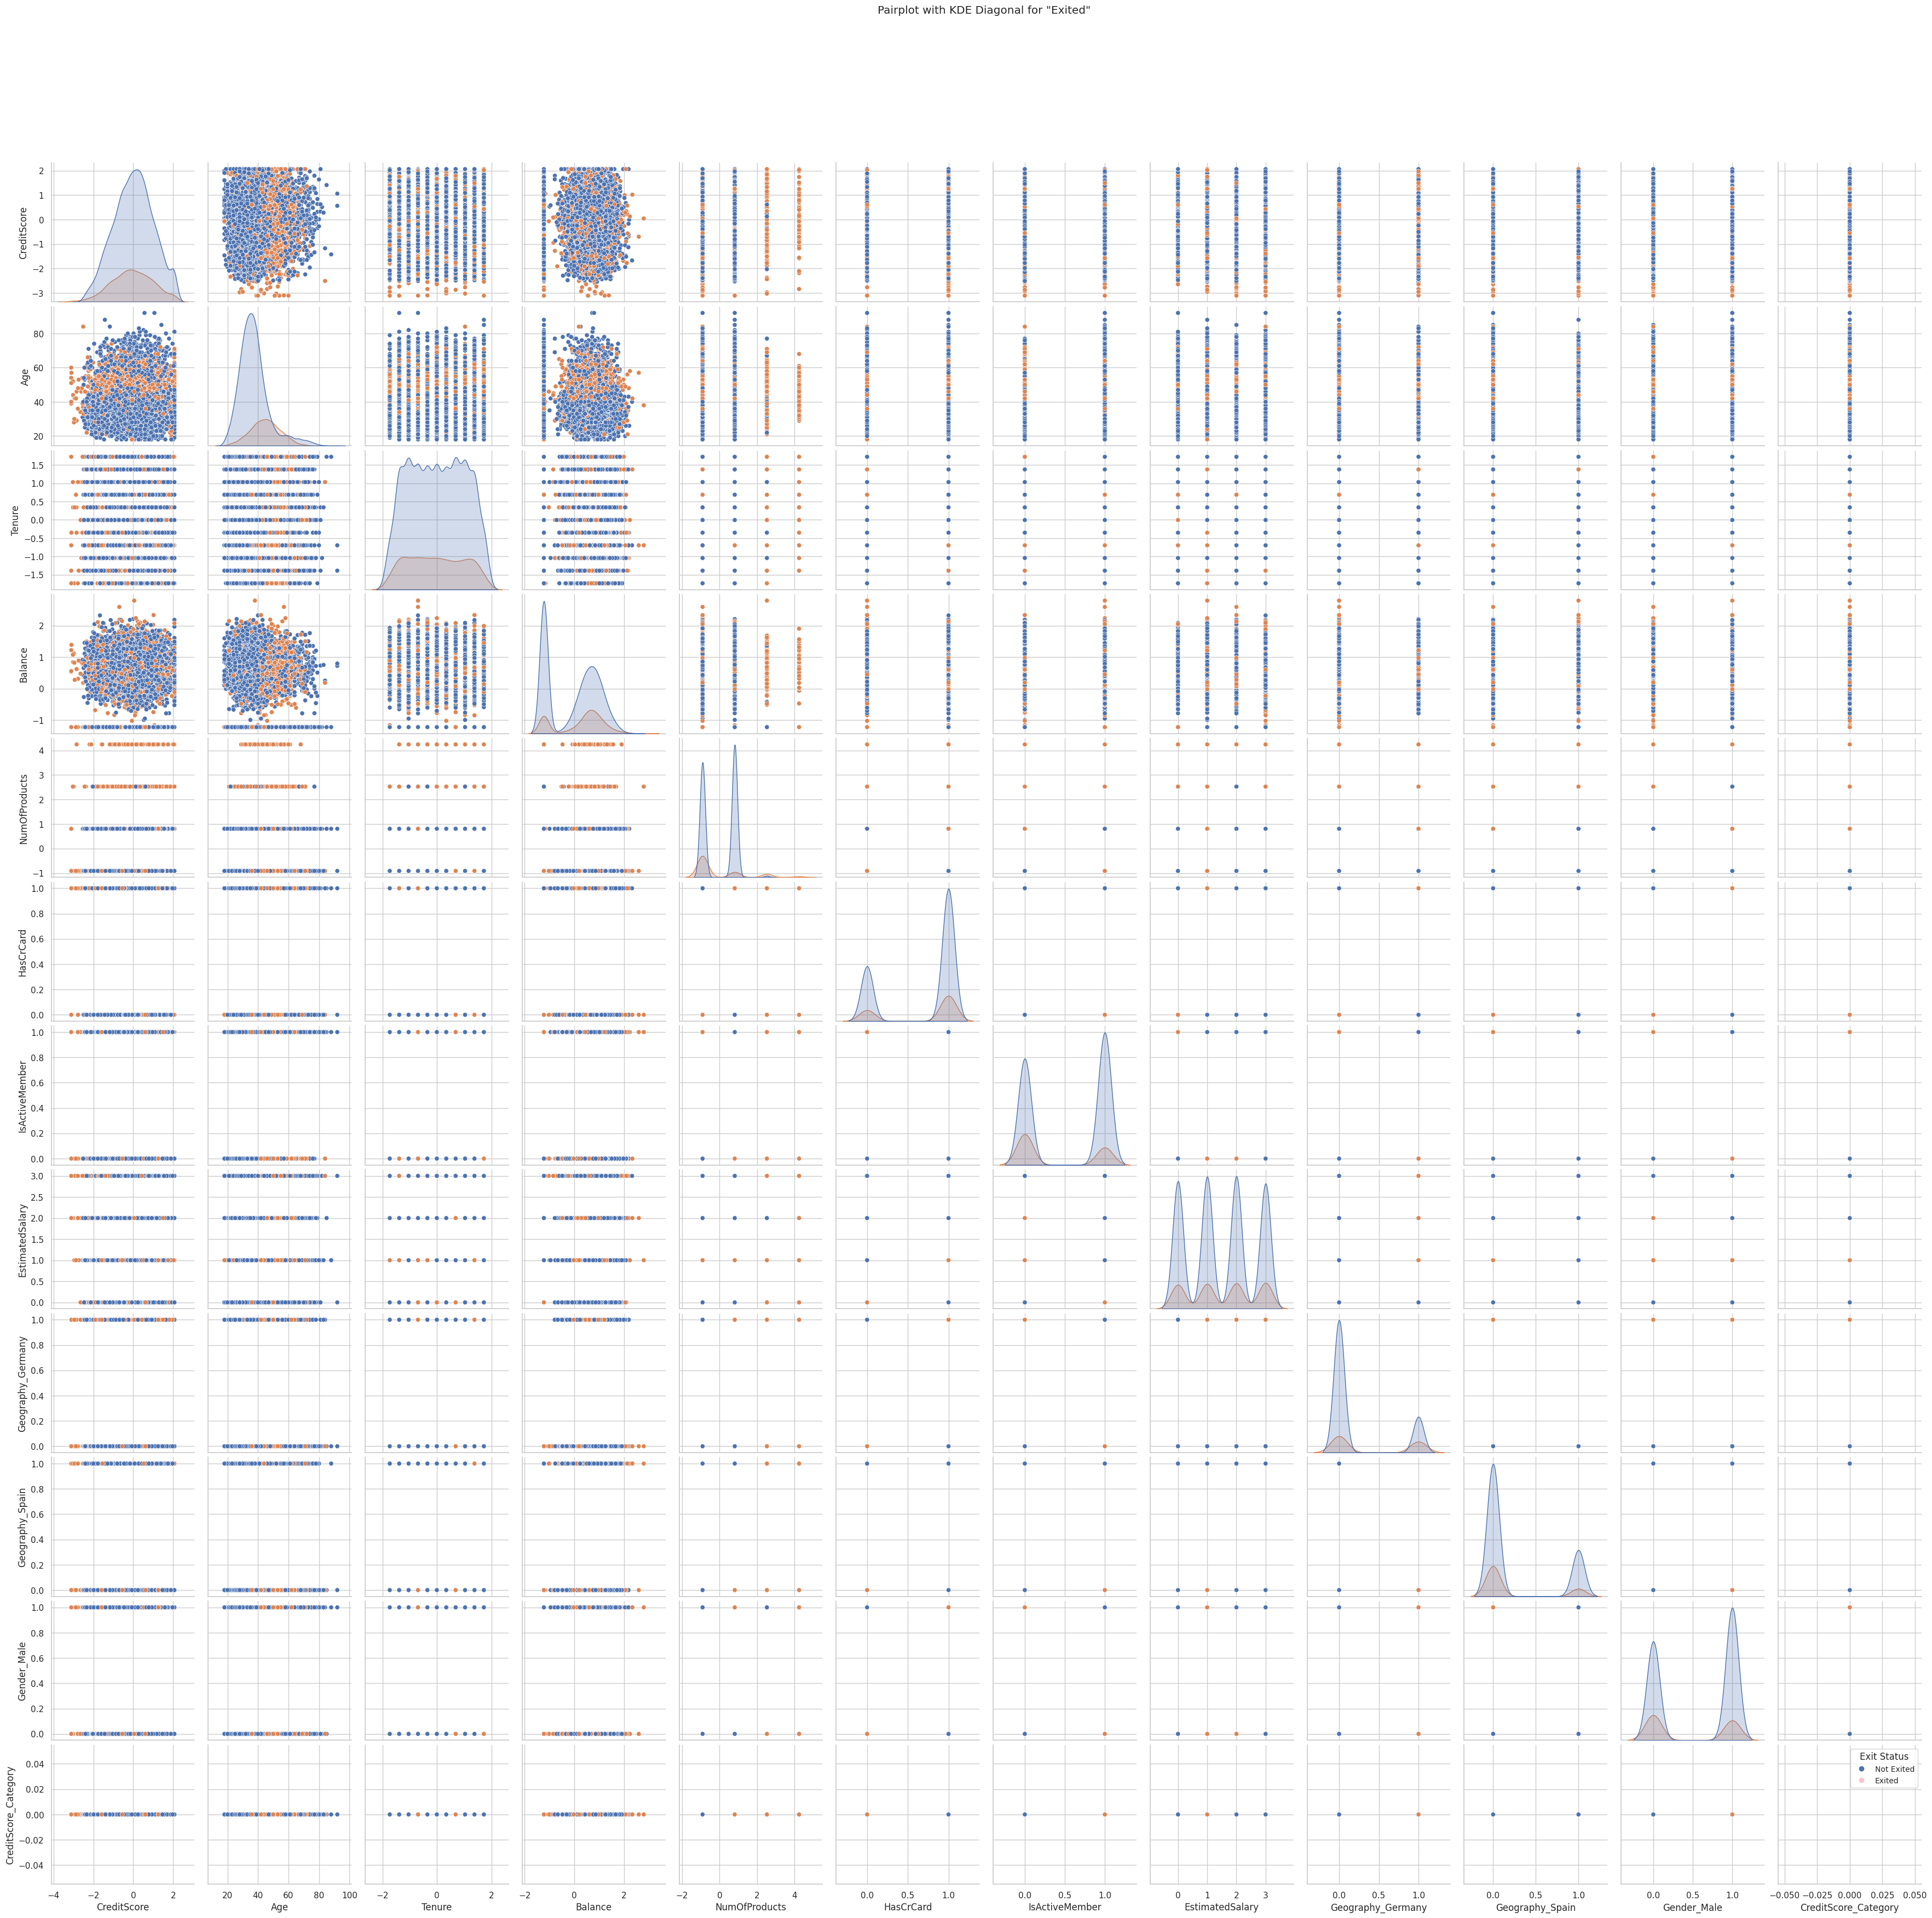

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Set the style of the plot (optional)
pairplot = sns.pairplot(data, hue="Exited", height=3, diag_kind="kde")
pairplot._legend.remove()
pairplot.fig.subplots_adjust(top=0.9)
pairplot.fig.suptitle('Pairplot with KDE Diagonal for "Exited"')

# Create a custom legend
legend_labels = ['Not Exited', 'Exited']
legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label=legend_labels[0])
legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=8, label=legend_labels[1])
plt.legend(handles=[legend, legend2], title='Exit Status', loc='upper right', fontsize=10)

plt.show()



<Axes: xlabel='Age', ylabel='Balance'>

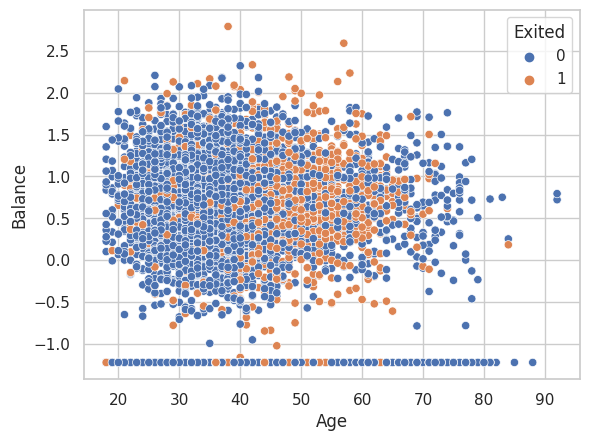

In [ ]:
sns.scatterplot(data=data, x="Age", y="Balance", hue="Exited")


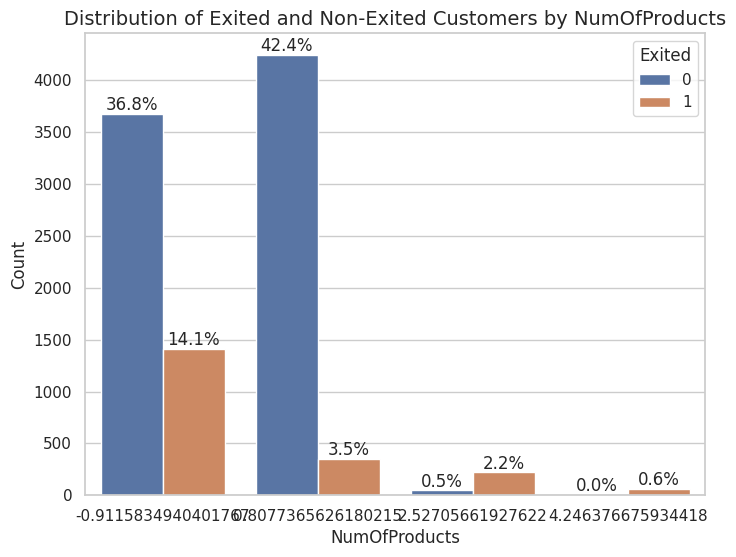

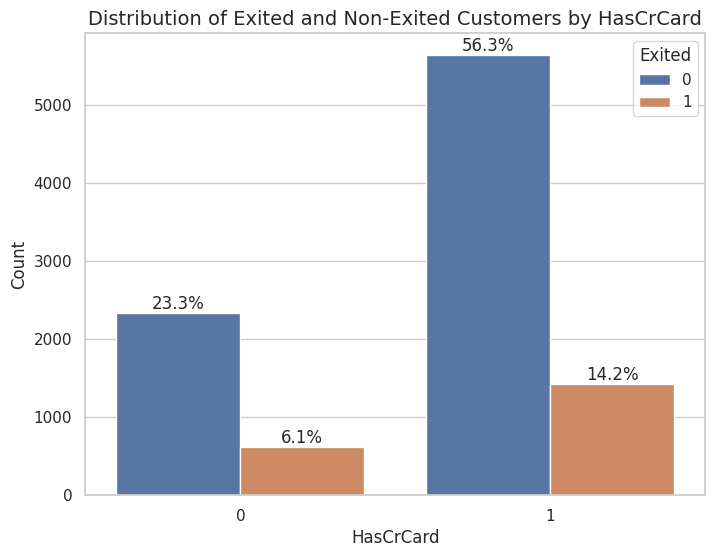

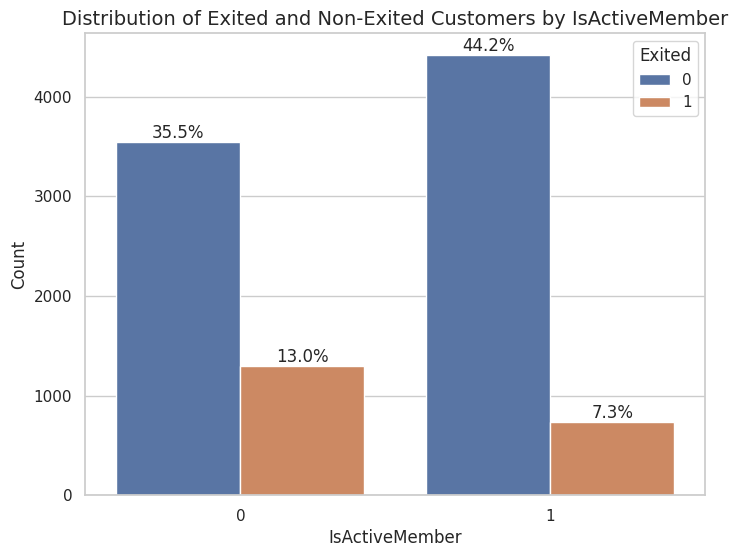

In [ ]:


# Rest of your code remains unchanged
total = float(len(data))
accepted_col = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']

for column in accepted_col:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue='Exited', ax=ax)
    ax.set_title('Distribution of Exited and Non-Exited Customers by ' + column, fontsize=14)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.show()


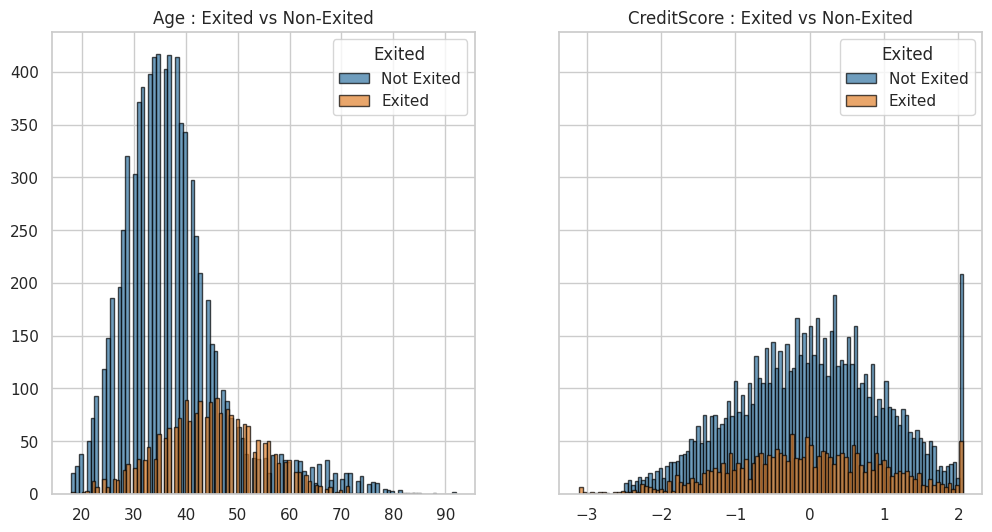

In [ ]:
import matplotlib.pyplot as plt

df_exited = data[data['Exited'] == 1]
df_not_exited = data[data['Exited'] == 0]
Excepted_col = ['Age', 'CreditScore']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

for i, column in enumerate(Excepted_col):
    axes[i].hist(x=column, bins=100, data=df_not_exited, edgecolor='black', color='#3274a1', alpha=0.7, label='Not Exited')
    axes[i].hist(x=column, bins=100, data=df_exited, edgecolor='black', color='#e1812c', alpha=0.7, label='Exited')
    axes[i].set_title(column + ' : Exited vs Non-Exited')
    axes[i].legend(title='Exited')

plt.show()


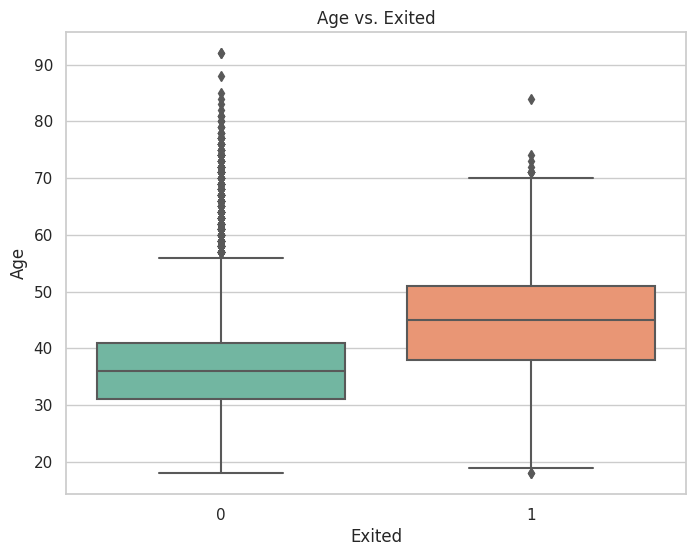

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Age' vs. 'Exited' with improved aesthetics
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set the style of the plot (optional)

# Customize the boxplot
ax = sns.boxplot(data=data, x='Exited', y='Age', palette="Set2")
ax.set_title('Age vs. Exited')
ax.set_xlabel('Exited')
ax.set_ylabel('Age')

# Show the plot
plt.show()


the boxplot has revealed the following insights:

For individuals aged between 30 and 40, there seems to be a higher likelihood of 'Exited' (i.e., they have a higher probability of exiting).
For individuals aged between 40 and 50, they appear to be staying (i.e., a lower probability of exiting).

In [ ]:
# Assuming your DataFrame is named 'data'
unique_credit_scores = data['CreditScore'].unique()
print(unique_credit_scores)


[-0.32622142 -0.44003595 -1.53679418  0.50152063  2.06388377 -0.05720525
  1.77417405 -2.84048792 -1.54714096  0.346319   -1.26777801 -1.58852806
 -1.80581035 -1.05049572 -0.16067301 -0.35726175  0.02556895 -0.65731824
  0.78088358  0.84296423 -0.15032623 -1.45401997  0.19111736  2.02249666
 -0.760786    1.09128685 -0.82286666 -0.79182633 -2.47835077 -0.61593114
 -1.21604413 -1.00910862 -1.35055222  0.73949648 -1.81615712 -1.66095549
  1.58793208 -0.70905212 -1.84719745 -1.91962488 -0.97806829  1.89833536
  0.09799638  1.29822236  1.84660148 -0.13997946 -1.04014895  0.49117386
 -0.6780118   1.42238367  0.0462625  -0.51246338  0.05660928  0.7705368
 -1.4436732  -0.3779553   0.94643199  0.37735933 -0.98841507 -0.49176983
  1.03955297 -0.7193989   0.87400456  0.10834316  0.25319802  0.90504489
  1.68105307  0.06695605 -0.48142306 -1.36089899  0.13938348  0.28423834
  1.10163363 -2.42661689  0.14973026  1.30856914 -1.11257638 -1.49540708
 -1.62991516  0.01522218  1.0292062   0.81192391 -0.

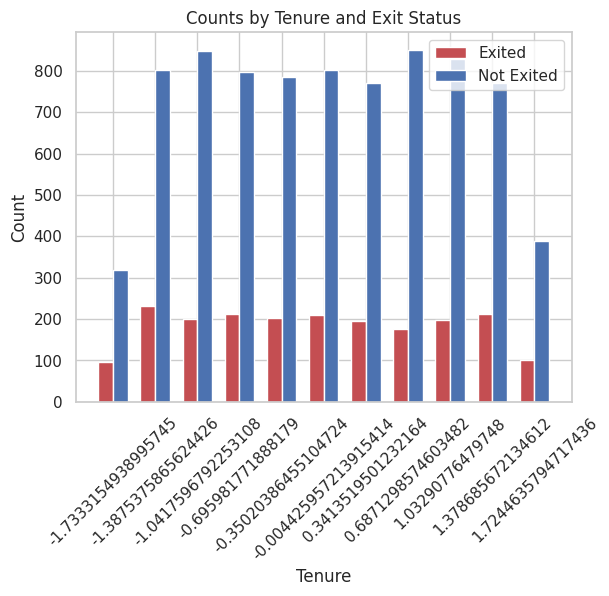

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Calculate the count of 'Exited' and 'Not Exited' for each 'Tenure' category
exited_counts = data[data['Exited'] == 1]['Tenure'].value_counts().sort_index()
not_exited_counts = data[data['Exited'] == 0]['Tenure'].value_counts().sort_index()

# Create the bar plot
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(exited_counts))

bar1 = ax.bar(index, exited_counts, bar_width, label='Exited', color='r')
bar2 = ax.bar(index + bar_width, not_exited_counts, bar_width, label='Not Exited', color='b')

ax.set_xlabel('Tenure')
ax.set_ylabel('Count')
ax.set_title('Counts by Tenure and Exit Status')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(exited_counts.index, rotation=45)  # Rotate the x-axis labels for better visibility
ax.legend()

plt.show()


Esto significa que, en el conjunto de datos, a medida que la edad de los clientes aumenta, es más probable que no hayan abandonado el banco. Por lo tanto, 'Age' podría ser una variable importante para predecir si un cliente se quedará o se irá.

Sin embargo, es importante recordar que la correlación no implica causalidad. Aunque 'Age' muestra una correlación positiva con 'Exited', esto no significa necesariamente que la edad sea la causa de que un cliente se quede o se vaya. Puede haber otros factores o variables ocultas que influyen en esta relación.

La variable más importante en comparación a los clientes que se retiran de la aplicación es Age.

# **THE MODEL**

In the first phase, Sara recommends not only analyzing the accuracy of the model but also applying other techniques. This is the best approach for the initial part.

In [ ]:
import numpy as np

In [ ]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
import xgboost as xgb
X = data[['Balance', 'Age']]  # Replace with the actual feature columns you want to use
y = data['Exited']               # Target variable

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBoost classifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = xg_cl.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred == y_test)) / y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.804


In the second part metrics and tools where applied:
In the context of the churn data, the main focus lies in identifying when clients leave the bank app. This requires a classification approach, where key evaluation measures include the ROC curve, recall, and F1 score. It's important to note that the RMSE is only relevant in the context of linear regression and isn't applicable here.


A confusion matrix is a tool used in the field of machine learning and classification to assess the performance of a classification model, particularly in supervised learning tasks. It is a matrix that helps you understand how well a model is performing in terms of making predictions for different classes.
True Negative(TN)|False positive (FP)
False Negative(FN)|True Positive (TP)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.6037809968217644
F1 Score:  0.5980629539951574

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1586
           1       0.60      0.60      0.60       414

    accuracy                           0.83      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.83      0.83      0.83      2000



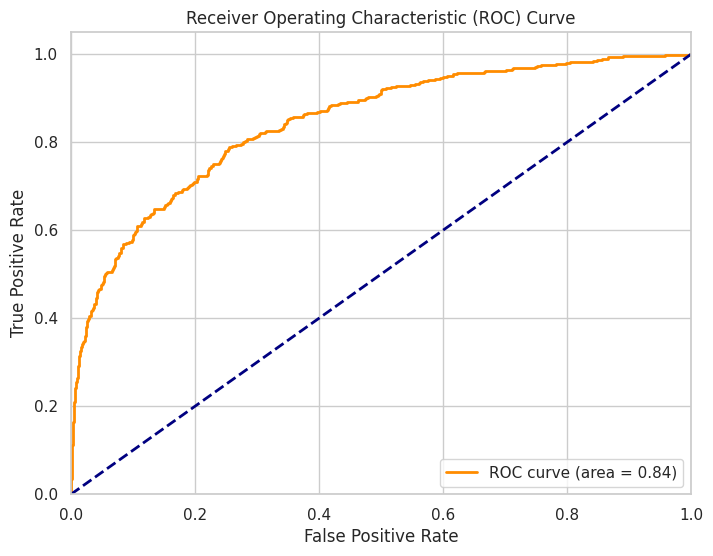

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded, define the feature columns and the target variable
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember']
X = data[numerical_features].copy()  # Extract the numerical features
y = data['Exited']

# Standardize the numerical features
scaler = StandardScaler()
X.loc[:, numerical_features] = scaler.fit_transform(X.loc[:, numerical_features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the hyperparameter grid for the Random Forest classifier
param_grid = {
        'n_estimators': [100, 300, 500, 800],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5]
    }

# Instantiate the Random Forest classifier with class weight balancing
rf_classifier = RandomForestClassifier(class_weight='balanced')

# Use StratifiedKFold and GridSearchCV for hyperparameter tuning, optimizing for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=cv, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
y_score = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best Parameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.8}
Best Score:  0.8555806154453224
F1 Score:  0.6270718232044199

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1586
           1       0.73      0.55      0.63       414

    accuracy                           0.86      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.86      0.86      2000



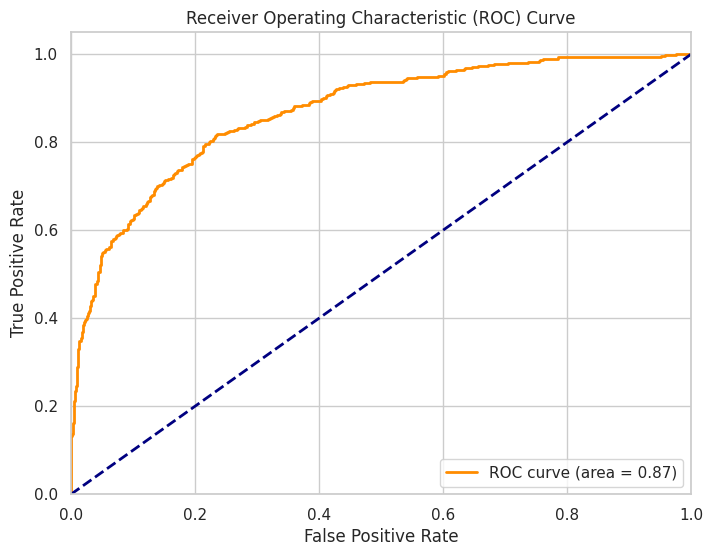

In [ ]:
#dddd
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded
X = data.drop(['Exited'], axis=1)
y = data['Exited']

# Preprocess the data
categorical_features = ['Age']
categorical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Define the hyperparameter grid for the XGBoost classifier
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate the XGBoost classifier
xgb_classifier = XGBClassifier()

# Use GridSearchCV for hyperparameter tuning, optimizing for F1 score
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(preprocessor.transform(X_test))

# Compute and print the F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
y_score = grid_search.best_estimator_.predict_proba(preprocessor.transform(X_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


A similar approach to machine learning implementation, utilizing popular algorithms such as XGBoost and Random Forest for classification tasks. They both involve the crucial process of hyperparameter optimization using GridSearchCV to identify the most effective parameter configuration.

Furthermore, both snippets share a common evaluation framework, assessing the models' performance through fundamental metrics such as the F1 score, ROC curve, and AUC. The visualization of the ROC curve serves as a vital tool in comprehensively evaluating the predictive capabilities of the models, providing insights into their ability to discern between positive and negative cases effectively.

Despite the use of different algorithms, the consistent application of these fundamental practices underscores their significance in the process of developing robust and reliable machine learning models for classification tasks.
/ Una aproximación similar a la implementación de aprendizaje automático, utilizando algoritmos populares como XGBoost y Random Forest para tareas de clasificación. Ambos implican el proceso crucial de optimización de hiperparámetros utilizando GridSearchCV para identificar la configuración de parámetros más efectiva.

Además, ambos fragmentos comparten un marco común de evaluación, que evalúa el rendimiento de los modelos a través de métricas fundamentales como la puntuación F1, la curva ROC y el AUC. La visualización de la curva ROC sirve como una herramienta vital para evaluar exhaustivamente las capacidades predictivas de los modelos, proporcionando ideas sobre su capacidad para discernir eficazmente entre casos positivos y negativos.

A pesar del uso de diferentes algoritmos, la aplicación constante de estas prácticas fundamentales resalta su importancia en el proceso de desarrollo de modelos de aprendizaje automático sólidos y confiables para tareas de clasificación.

Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}
Best Score:  0.8760452486807969
F1 Score:  0.8919614147909969

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1613
           1       0.90      0.88      0.89      1573

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



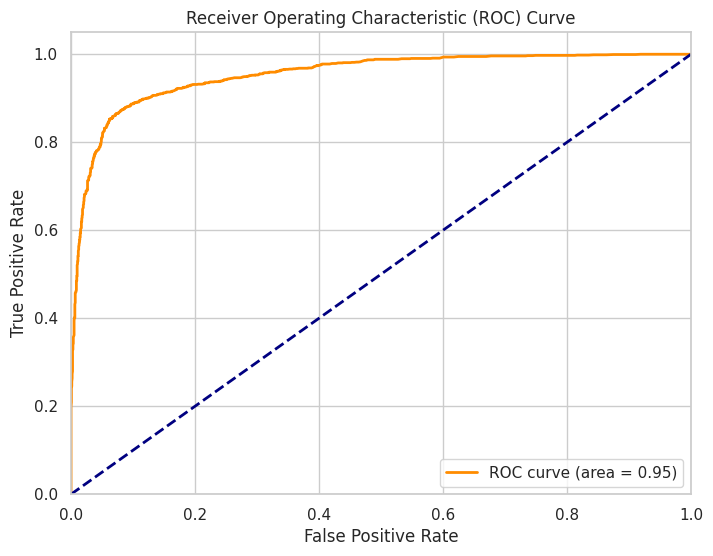

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded, define the feature columns and the target variable
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember']
X = data[numerical_features].copy()  # Extract the numerical features
y = data['Exited']

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Standardize the numerical features
scaler = StandardScaler()
X_res.loc[:, numerical_features] = scaler.fit_transform(X_res.loc[:, numerical_features])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

# Define the hyperparameter grid for the Random Forest classifier
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Use StratifiedKFold and GridSearchCV for hyperparameter tuning, optimizing for F1 score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=cv, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute and print the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area for each class
y_score = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Mejores Parámetros:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.7}
Mejor Puntaje:  0.6074989701982643
Puntaje F1:  0.673740053050398

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7963
           1       0.84      0.56      0.67      2037

    accuracy                           0.89     10000
   macro avg       0.87      0.77      0.80     10000
weighted avg       0.89      0.89      0.88     10000



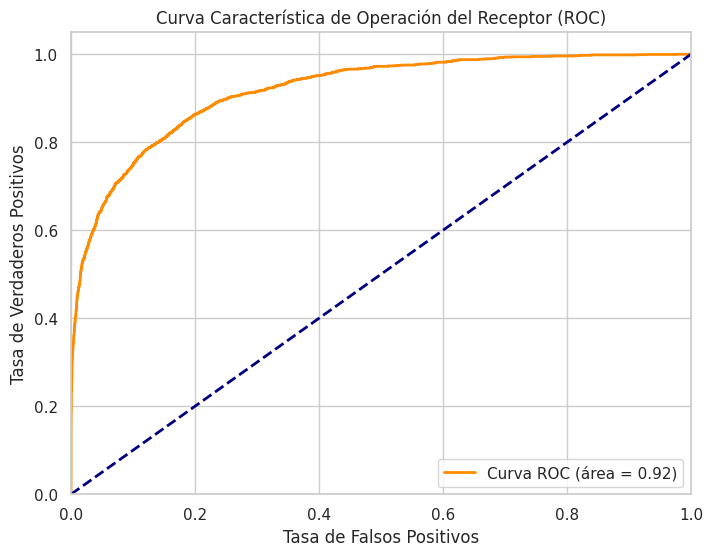

In [ ]:
#mejorado
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Suponiendo que los datos ya están cargados en 'data'
X = data.drop(['Exited'], axis=1)  # Asegúrate de que la columna 'Age' se incluya aquí
y = data['Exited']

# Definir el grid de parámetros para la optimización de hiperparámetros
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
    # booster
}

# Usar StratifiedKFold y GridSearchCV para la optimización de hiperparámetros, optimizando según el puntaje F1
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
xgb_classifier = XGBClassifier()
grid_search = GridSearchCV(xgb_classifier, param_grid, scoring='f1', cv=cv)
grid_search.fit(X, y)

# Imprimir los mejores parámetros y la mejor puntuación obtenida durante la búsqueda en el grid
print("Mejores Parámetros: ", grid_search.best_params_)
print("Mejor Puntaje: ", grid_search.best_score_)

# Evaluar el modelo en el conjunto de datos completo
y_pred = grid_search.best_estimator_.predict(X)

# Calcular e imprimir el puntaje F1 y el informe de clasificación
f1 = f1_score(y, y_pred)
print("Puntaje F1: ", f1)
print("\nInforme de Clasificación:")
print(classification_report(y, y_pred))

# Calcular la curva ROC y el área ROC para cada clase
y_score = grid_search.best_estimator_.predict_proba(X)[:, 1]
fpr, tpr, _ = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica de Operación del Receptor (ROC)')
plt.legend(loc="lower right")
plt.show()


# **First decision tree from an XGBoost classifier trained during a grid

*   Elemento de lista
*   Elemento de lista

search**

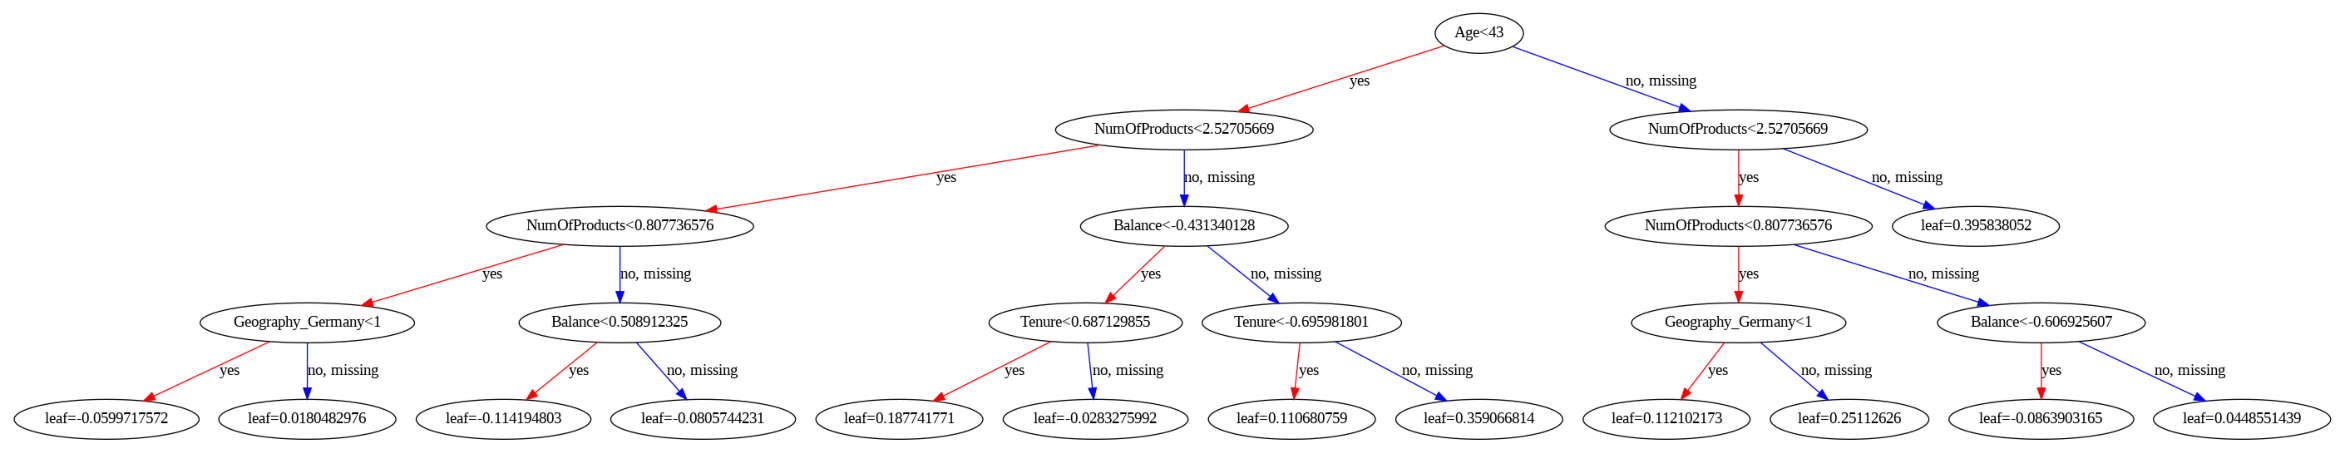

In [ ]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming you have a pre-trained XGBoost model named 'best_xgb_model'
# Replace this with your actual trained model
best_xgb_model = grid_search.best_estimator_

# Plot the first tree of the XGBoost model
fig, ax = plt.subplots(figsize=(30, 30))
plot_tree(best_xgb_model, num_trees=0, ax=ax)
plt.savefig('xgboost_tree.png')



# **Simulation of Prediction Model Workflow with RandomForestClassifier Training and Prediction for Dataset Entries/Simulación del flujo de trabajo del modelo de predicción con entrenamiento y predicción del RandomForestClassifier para entradas de conjunto de datos.**

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Ejemplo de DataFrame simulado
data = pd.DataFrame({
    'CreditScore': np.random.randint(350, 850, 100),
    'Age': np.random.randint(18, 80, 100),
    'Tenure': np.random.randint(0, 10, 100),
    'Balance': np.random.uniform(0, 250000, 100),
    'NumOfProducts': np.random.randint(1, 4, 100),
    'EstimatedSalary': np.random.uniform(0, 500000, 100),
    'IsActiveMember': np.random.randint(0, 2, 100),
    'Gender': np.random.choice(['Male', 'Female'], size=100)
})

# Simulación de la predicción del modelo
data['Exited'] = np.random.choice([0, 1], size=len(data))

# Crear una función para simular la predicción del modelo
def simulate_prediction(row, model):
    X = row[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'IsActiveMember']].values.reshape(1, -1)
    X = scaler.transform(X)
    prediction = model.predict(X)
    return prediction[0]

# Definir el modelo
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'IsActiveMember']
X = data[numerical_features].copy()
y = data['Exited']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

scaler = StandardScaler()
X_res.loc[:, numerical_features] = scaler.fit_transform(X_res.loc[:, numerical_features])

model = RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=1, min_samples_split=2)
model.fit(X_res, y_res)

# Aplicar la función de simulación de predicción al DataFrame
data['Predicted'] = data.apply(lambda row: simulate_prediction(row, model), axis=1)

# Mostrar los primeros 10 elementos del DataFrame
print(data.head(10))


   CreditScore  Age  Tenure        Balance  NumOfProducts  EstimatedSalary  \
0          473   40       1   92650.776018              2     12766.515065   
1          793   75       1  140871.324966              2      6842.577045   
2          605   37       5  202705.125116              3    203155.182500   
3          675   49       6    6239.854589              1    396404.357943   
4          792   78       8  171939.732775              3    165213.156765   
5          817   23       0   89717.085712              1    191528.340013   
6          645   45       7  190383.375852              1     28845.305936   
7          795   42       9    8895.084866              2    149336.436329   
8          616   49       9  159428.695369              1    193302.604769   
9          844   33       3  216354.223989              3    169632.192278   

   IsActiveMember  Gender  Exited  Predicted  
0               0  Female       1          1  
1               0  Female       0          0  
